## 3.4 Метод наискорейшего спуска и метод минимальных невязок
Напишите программу для решения линейной системы с действительной матрицей $Ax = b, A = A^T > 0$ методом минимальных невязок и методом наискорейшего спуска.

47 iterations were counted
Mistake is  8.072162101019393e-07


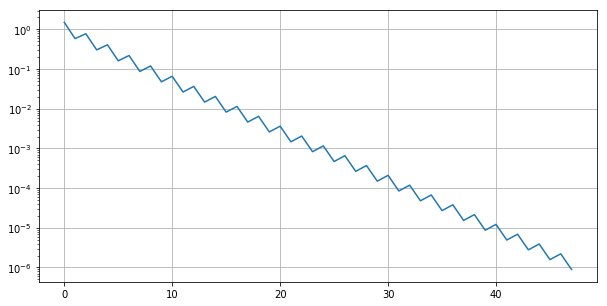

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def solve_iter_boost(A, b, max_iter, tol, grad_boost = True):
    iter = 0
    x = np.zeros(len(b))
    r = A @ x - b
    residual = np.array([np.linalg.norm(r)])
    while (iter < max_iter and np.linalg.norm(r) > tol):
        iter += 1
        if (grad_boost):
            t = np.linalg.norm(r)**2 / np.dot(A @ r, r)
        else:
            t = np.dot(r, A @ r) / (np.linalg.norm(A @ r)**2)
        x = x - t*r
        r = A @ x - b
        residual = np.append(residual, np.linalg.norm(r))
    return x, residual, iter

n = 5
A = np.random.rand(n, n)
A = A @ A.T + np.eye(n)
b = np.random.rand(n)
#print(A)
my_x, residual, iter = solve_iter_boost(A, b, 1000, 1e-6, True)
print(iter, "iterations were counted")
print("Mistake is ", np.linalg.norm(my_x - np.linalg.solve(A, b)))
fig, ax = plt.subplots(figsize = (10, 5))
ax.semilogy(residual)
ax.grid(True)